In [1]:
import GCRCatalogs
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf

# Start by loading the redMaGiC halo catalog from CosmoDC2

In [232]:
# read in redmagic catalog
redmagic = pf.open('/global/projecta/projectdirs/lsst/groups/WL/users/zuntz/data/redmagic/cosmoDC2_v1.1.4_run_redmagic_highdens.fit')
redmagic_ids = redmagic[1].data['id']
redmagic_z = redmagic[1].data['zredmagic']
bins = {}
nbins = 5
zbin = 'bin5'
if zbin == 'bin1':
    bin_sel = (redmagic_z> 0.15)&(redmagic_z< 0.30)
if zbin == 'bin2':
    bin_sel = (redmagic_z> 0.30)&(redmagic_z< 0.45)  
if zbin == 'bin3':
    bin_sel = (redmagic_z> 0.45)&(redmagic_z< 0.60) 
if zbin == 'bin4':
    bin_sel = (redmagic_z> 0.60)&(redmagic_z< 0.75) 
if zbin == 'bin5':
    bin_sel = (redmagic_z> 0.75)&(redmagic_z< 0.90) 

In [3]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

In [4]:
# 'mag_i',

In [182]:
#halo_all = gc.get_quantities(['halo_mass',  'redshift', 'halo_id', 'galaxy_id', 'isCentral'], filters=['redshift < 0.75', 'redshift > 0.']) # for first three bins
halo_all = gc.get_quantities(['halo_mass',  'redshift', 'halo_id', 'galaxy_id', 'isCentral'], filters=['redshift < 1.2', 'redshift > 0.3'])

In [183]:
halo_all_big = halo_all

In [233]:
if zbin == 'bin1':
    zmin = 0.
    zmax = 0.45
if zbin == 'bin2':
    zmin = 0.15
    zmax = 0.6
if zbin == 'bin3':
    zmin = 0.35
    zmax = 0.75
if zbin == 'bin4':
    zmin = 0.50
    zmax = 0.9
if zbin == 'bin5':
    zmin = 0.55
    zmax = 1.05
zmask = (halo_all_big['redshift']< zmax)&(halo_all_big['redshift'] > zmin)
halo_all = {}
for key in halo_all_big:
    halo_all[key] = halo_all_big[key][zmask]

In [234]:
halo_all

{'isCentral': array([ True,  True,  True, ..., False,  True,  True]),
 'halo_id': array([       151315,     100151315,     200151315, ..., 3407700146235,
        3411300146235, 3424100146235]),
 'redshift': array([0.57377426, 0.57460683, 0.57893328, ..., 1.04996001, 1.04723304,
        1.04964203]),
 'galaxy_id': array([9438032234, 9438032235, 9438032236, ..., 9127825487, 9127825527,
        9127825741]),
 'halo_mass': array([2.81096780e+11, 1.27534625e+11, 1.30137374e+11, ...,
        2.08479726e+12, 9.89043928e+10, 7.28769147e+10])}

In [235]:
iscentral = halo_all['isCentral']==True

mask_all = np.in1d(halo_all['galaxy_id'],redmagic_ids[bin_sel])
mask_cent = np.in1d(halo_all['galaxy_id'][iscentral],redmagic_ids[bin_sel])
mask_sat = np.in1d(halo_all['galaxy_id'][~iscentral],redmagic_ids[bin_sel])


In [240]:
print (mask_all.sum(), mask_cent.sum(), mask_sat.sum())
print (len(redmagic_ids[bin_sel]), mask_all.sum())
assert (len(redmagic_ids[bin_sel])==mask_all.sum())


175159 101851 73308
175159 175159


In [241]:
len(redmagic_ids[bin_sel])

175159

In [242]:
mask_all.sum()

175159

In [243]:
halo_mass_all = halo_all['halo_mass'][mask_all]
redshift_all = halo_all['redshift'][mask_all]
halo_mass_cent = halo_all['halo_mass'][iscentral][mask_cent]
halo_mass_sat = halo_all['halo_mass'][~iscentral][mask_sat]


halo_id_all= halo_all['halo_id'][mask_all]
#halo_id_cent = halo_all['halo_id'][iscentral][mask_cent]
#halo_id_sat = halo_all['halo_id'][~iscentral][mask_sat]

In [244]:
#number of halos occupied by at least one redmagic galaxy
n_halos = len(np.unique(halo_id_all))
print("The number of halos is:", n_halos)

#number of galaxies
n_tot = mask_all.sum()
print("The total number of galaxies is:", n_tot)
n_cent = mask_cent.sum()
print("The number of central galaxies is:", n_cent)
n_sat = mask_sat.sum()
print("The number of satellite galaxies is:", n_sat)
assert(n_tot==n_cent+n_sat)
sat_frac = n_sat/n_tot
print("The satellite fraction is:", sat_frac)
fcen = n_cent/n_halos
print("fcen is (fraction of halos occupied with central galaxies):", fcen)

The number of halos is: 135401
The total number of galaxies is: 175159
The number of central galaxies is: 101851
The number of satellite galaxies is: 73308
The satellite fraction is: 0.4185225994667702
fcen is (fraction of halos occupied with central galaxies): 0.7522174873154556


In [245]:
# mean halo mass of halos where satellites live is higher than where centrals live. That is because centrals are more visible. 
halo_mass_all.mean()/10**(13), halo_mass_cent.mean()/10**(13), halo_mass_sat.mean()/10**(13)

(2.9593134023276204, 0.8010417964485471, 5.957923667651862)

In [246]:
halo_mass_all.std()/10**(13)

8.12661045845743

In [247]:
# create unique halo catalog of halos occupied by at least one redmagic galaxy:
halo_cat = {}
halo_cat['ids'], index_halo_unique = np.unique(halo_id_all, return_index=True)
halo_cat['mass'] = halo_mass_all[index_halo_unique]
halo_cat['redshift'] = redshift_all[index_halo_unique]

In [248]:
halo_cat['mass']

array([2.24899073e+12, 1.59838097e+12, 1.74286555e+12, ...,
       1.87519578e+13, 1.87805825e+13, 2.35028231e+12])

In [249]:
# create unique halo catalog of all halos in cosmodc2
halo_cat_full = {}
if zbin == 'bin1': 
    zbin_halos = (halo_all['redshift']>0.15) & (halo_all['redshift']<0.3)
if zbin == 'bin2': 
    zbin_halos = (halo_all['redshift']>0.30) & (halo_all['redshift']<0.45)
if zbin == 'bin3': 
    zbin_halos = (halo_all['redshift']>0.45) & (halo_all['redshift']<0.6)
if zbin == 'bin4': 
    zbin_halos = (halo_all['redshift']>0.60) & (halo_all['redshift']<0.75)
if zbin == 'bin5': 
    zbin_halos = (halo_all['redshift']>0.75) & (halo_all['redshift']<0.90)
       
halo_cat_full['ids'], index_halo_unique = np.unique(halo_all['halo_id'][zbin_halos], return_index=True)
halo_cat_full['mass'] = halo_all['halo_mass'][zbin_halos][index_halo_unique]

n_halos_cosmodc2 = len(np.unique(halo_all['halo_id'][zbin_halos]))
print("The number of halos in cosmodc2 is:", n_halos_cosmodc2)

The number of halos in cosmodc2 is: 81692848


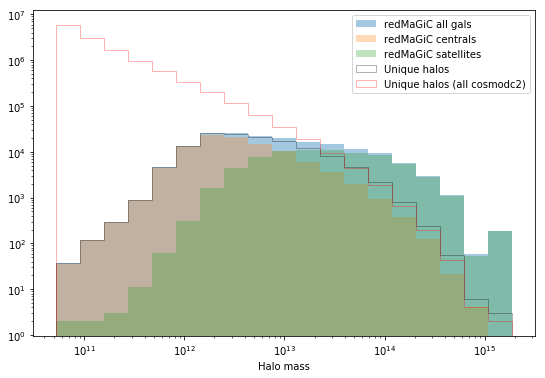

In [250]:
plt.figure(figsize = (9,6))
nbins = 20
bins = np.logspace(np.log10(halo_cat['mass'].min()), np.log10(halo_cat['mass'].max()), nbins)
#bins = np.logspace(np.log10(5*10**9), np.log10(1.15*10**16), nbins)
counts_allgals, _, _= plt.hist(halo_mass_all, label = 'redMaGiC all gals', bins = bins, log= True, alpha = 0.4)
counts_cent, _, _ = plt.hist(halo_mass_cent, label = 'redMaGiC centrals', bins = bins, log = True, alpha = 0.3)
counts_sat, _, _= plt.hist(halo_mass_sat, label = 'redMaGiC satellites', bins = bins, log= True, alpha = 0.3)
counts_uniquehalos, _, _  = plt.hist(halo_cat['mass'], label = 'Unique halos', bins = bins, alpha = 0.3, histtype = 'step', color = 'k')
counts_uniquehalos_cosmodc2, _, _  = plt.hist(halo_cat_full['mass'], label = 'Unique halos (all cosmodc2)', bins = bins, alpha = 0.3, histtype = 'step', color = 'red')
plt.xlabel('Halo mass')
plt.legend()
plt.xscale('log') 
plt.yscale('log')

In [251]:
print(np.log10(halo_cat['mass'].min()), np.log10(halo_cat['mass'].max()))
print(np.log10(5*10**10), np.log10(1.15*10**15))

10.716461845981158 15.278039264606997
10.698970004336019 15.060697840353612


### Plot the number of galaxies divided by the total number of halos in CosmoDC2

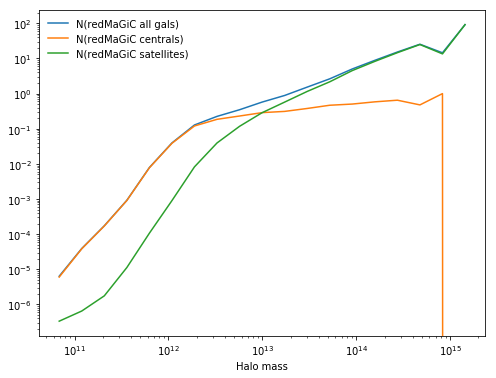

In [252]:
plt.figure(figsize = (8,6))
bins_centers = np.sqrt(bins[1:] * bins[:-1]) #geometric mean
plt.plot(bins_centers, counts_allgals/counts_uniquehalos_cosmodc2, label = 'N(redMaGiC all gals)') #, color = 'blue' )
plt.plot(bins_centers, counts_cent/counts_uniquehalos_cosmodc2, label = 'N(redMaGiC centrals)' )#, color = 'orange' )
plt.plot(bins_centers, counts_sat/counts_uniquehalos_cosmodc2, label =  'N(redMaGiC satellites)')#, color = 'green')
#plt.axhline(y=fcen_2, color= 'black', ls = ':', label = 'fcen=%0.2f'%fcen )
plt.xlabel('Halo mass')
plt.legend(frameon=False)
plt.xscale('log') 
plt.yscale('log')

In [253]:
bins_centers

array([6.86283183e+10, 1.19285149e+11, 2.07333463e+11, 3.60373148e+11,
       6.26376485e+11, 1.08872568e+12, 1.89235011e+12, 3.28915630e+12,
       5.71699133e+12, 9.93689167e+12, 1.72716400e+13, 3.00204086e+13,
       5.21794649e+13, 9.06948535e+13, 1.57639724e+14, 2.73998817e+14,
       4.76246404e+14, 8.27779623e+14, 1.43879114e+15])

In [254]:
#centrals_with_satellites = np.in1d(halo_id_cent, halo_id_sat)
#print("Fraction of central galaxies that have satellite galaxies:", centrals_with_satellites.sum()/n_cent)
#satellites_with_a_central = np.in1d(halo_id_sat, halo_id_cent)
#print("Fraction of satellite galaxies that have a central galaxy:", satellites_with_a_central.sum()/n_sat)
#halo_ids_halos_with_both_centrals_and_satellites= []
#halo_ids_halos_with_both_centrals_and_satellites.extend(halo_id_cent[centrals_with_satellites])
#halo_ids_halos_with_both_centrals_and_satellites.extend(halo_id_sat[satellites_with_a_central])
#print("Fraction of halos that host at least one redmagic galaxy and that are occupied by both centrals and satellites:", len(np.unique(halo_ids_halos_with_both_centrals_and_satellites))/n_tot)

## Fitting the HOD parameters

In [255]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import scipy

In [256]:
halo_mass = bins_centers
N_cent = counts_cent/counts_uniquehalos_cosmodc2
N_sat = counts_sat/counts_uniquehalos_cosmodc2

In [257]:
N_sat

array([3.35307962e-07, 6.51852876e-07, 1.76122177e-06, 1.12538992e-05,
       1.06743981e-04, 9.01835901e-04, 8.24150943e-03, 3.94343215e-02,
       1.17381735e-01, 2.86439960e-01, 5.73466021e-01, 1.15301407e+00,
       2.16712899e+00, 4.52248394e+00, 8.26000000e+00, 1.45916230e+01,
       2.49090909e+01, 1.35000000e+01, 9.15000000e+01])

In [258]:
N_cent

array([6.03554331e-06, 3.84593197e-05, 1.71425586e-04, 9.09519673e-04,
       7.76476381e-03, 3.85630945e-02, 1.19894340e-01, 1.85468518e-01,
       2.30392461e-01, 2.87484126e-01, 3.11744984e-01, 3.77756774e-01,
       4.66481738e-01, 5.04282655e-01, 5.83076923e-01, 6.49214660e-01,
       4.77272727e-01, 1.00000000e+00, 0.00000000e+00])

### Fit each of the lines separately

In [259]:
# see example from https://stackoverflow.com/questions/51906152/fitting-two-sets-of-data-with-two-different-model-functions-simultaneously-givin
if zbin == 'bin1':
    nstart = 2 
    ncut_cent=0
if zbin == 'bin2':  
    nstart = 3
    ncut_cent=0
if zbin == 'bin3':  
    nstart = 3
    ncut_cent=0
if zbin == 'bin4':  
    nstart = 2
    ncut_cent=0
if zbin == 'bin5':  
    nstart = 1
    ncut_cent=1
    
if ncut_cent>0:
    y1 = np.log10(N_cent[:-ncut_cent])
else:
    y1 = np.log10(N_cent)
y2 = np.log10(N_sat[nstart:])
comboY = np.append(y1, y2)

if ncut_cent>0:
    x1 = halo_mass[:-ncut_cent]
else:
    x1 = halo_mass
x2 = halo_mass[nstart:]
comboX = np.append(x1, x2)

if len(y1) != len(x1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y2) != len(x2):
    raise(Exception('Unequal x2 and y2 data length'))
    
    
def function1(Mh, Mmin, sigma_logM, fcen, M1, alpha): #  not all parameters are used here, some are shared
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    centrals = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    return np.log10(centrals)

def function2(Mh, Mmin, sigma_logM, fcen, M1, alpha):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    nc = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    satellites = nc * (Mh/M1)**alpha
    return np.log10(satellites)


    
def combinedFunction(comboData, Mmin, sigma_logM, fcen, M1, alpha):
    # single data reference passed in, extract separate data
    extract1 = comboData[:len(x1)] # first data
    extract2 = comboData[len(x1):] # second data

    result1 = function1(extract1, Mmin, sigma_logM, fcen, M1, alpha)
    result2 = function2(extract2, Mmin, sigma_logM, fcen, M1, alpha)

    return np.append(result1, result2)


# some initial parameter values
Mmin_0 = 10**12
simga_logM_0 = 0.3
fcen_0 = 0.2
M1_0 = 10**13
alpha_0 = 1.

initialParameters = np.array([Mmin_0,simga_logM_0, fcen_0, M1_0, alpha_0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters, maxfev = 100000)

# values for display of fitted function
Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit = fittedParameters

y_fit_1 = function1(x1, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # first data set, first equation
y_fit_2 = function2(x2, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # second data set, second equation

# Total profile: ⟨N (Mh )⟩ = ⟨Nc (Mh )⟩ + ⟨Ns (Mh )⟩
if ncut_cent>0:
    y_fit_1_sameshape = np.array( list(10**y_fit_1) + [0]*ncut_cent)
else:
    y_fit_1_sameshape = 10**y_fit_1
y_fit_2_sameshape = np.array([0]*nstart + list(10**y_fit_2))
y_total_nolog = y_fit_1_sameshape + y_fit_2_sameshape

# interpolate total profile
N_total = interp1d(halo_mass, y_total_nolog, kind='linear', axis=- 1, copy=True, bounds_error=None, assume_sorted=False)

print('Mmin = %0.2e, sigma_logM = %0.2f, fcen = %0.2f, M1 = %0.2e, alpha = %0.2f'%(Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit))

Mmin = 7.68e+12, sigma_logM = 0.67, fcen = 0.60, M1 = 1.57e+13, alpha = 1.06


In [260]:
def N_total_function(Mh):
    """
    Total HOD.
    """
    cent = function1(Mh, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit)
    sat = function2(Mh, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit)
    return 10**cent + 10**sat

In [261]:
perr = np.sqrt(np.diag(pcov))
np.array([np.log10(Mmin_fit), sigma_logM_fit, fcen_fit, np.log10(M1_fit), alpha_fit])
np.savetxt('../HOD_pars/hod_pars_err_%s.txt'%zbin, np.c_[fittedParameters, perr], header = 'Best-fit, err [Mmin, sigma_logM, fcen, M1, alpha', fmt = '%0.3g')

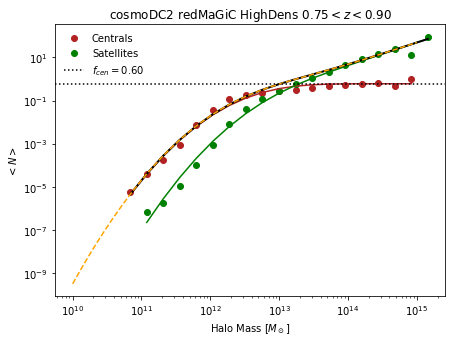

In [262]:
plt.figure(figsize = (7,5))
plt.plot(x1, 10**y1, 'o', color = 'firebrick', label = 'Centrals') # plot the raw data
plt.plot(x2, 10**y2, 'o', color = 'green', label = 'Satellites') # plot the raw data
plt.plot(x1, 10**y_fit_1, color = 'firebrick') # plot the equation using the fitted parameters
plt.plot(x2, 10**y_fit_2, color = 'g') # plot the equation using the fitted parameters
plt.plot(halo_mass, y_total_nolog, color = 'k', lw = 2) # plot the equation using the fitted parameters
#plt.plot(x1, N_total(x1), color = 'gray', lw= 0.5)
m_arr = np.geomspace(10**10,10**15,128)
#Numgal = N_total(m_arr)
plt.plot(m_arr, N_total_function(m_arr), 'orange', ls = '--')
#plt.plot(m_arr, Numgal, color = 'w', lw = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$<N>$')
plt.xlabel ('Halo Mass [$M_\odot$]')
if zbin == 'bin1':
    plt.title('cosmoDC2 redMaGiC HighDens $0.15< z< 0.3$')
if zbin == 'bin2':
    plt.title('cosmoDC2 redMaGiC HighDens $0.30< z< 0.45$')
if zbin == 'bin3':
    plt.title('cosmoDC2 redMaGiC HighDens $0.45< z< 0.60$')
if zbin == 'bin4':
    plt.title('cosmoDC2 redMaGiC HighDens $0.60< z< 0.75$')
if zbin == 'bin5':
    plt.title('cosmoDC2 redMaGiC HighDens $0.75< z< 0.90$')
plt.axhline(y = fcen_fit, label = '$f_{cen} = %0.2f$'%fcen_fit, ls = ':', color  = 'k')
plt.legend(frameon=False)
plt.savefig('../plots/HOD_%s.png'%zbin, dpi = 300)
plt.show()
np.savetxt('../HOD_pars/profile_%s.txt'%zbin, np.c_[halo_mass, y_fit_1_sameshape, y_fit_2_sameshape, y_total_nolog, N_total(halo_mass)], header = 'Halo Mass(Solar Units), Centrals(data), Satellites(Data), Total(Data), Total(Theory Fit)' )

In [263]:
print('Log(Mmin) = %0.2f, sigma_logM = %0.2f, fcen = %0.2f, Log(M1) = %0.2f, alpha = %0.2f'%(np.log10(Mmin_fit), sigma_logM_fit, fcen_fit, np.log10(M1_fit), alpha_fit))
np.savetxt('../HOD_pars/hod_pars_%s.txt'%zbin, np.array([np.log10(Mmin_fit), sigma_logM_fit, fcen_fit, np.log10(M1_fit), alpha_fit]), header = 'Log(Mmin), sigma_logM, fcen, Log(M1), alpha', fmt = '%0.3f')

Log(Mmin) = 12.89, sigma_logM = 0.67, fcen = 0.60, Log(M1) = 13.20, alpha = 1.06


## Try to do the same but with CCL HOD modeling

# Get galaxy bias from HOD parameters

In [264]:
import pyccl as ccl
import numpy as np

# see https://github.com/LSSTDESC/CCLX/blob/master/Halo-mass-function-example.ipynb for examples 

## Try to do the whole integration with CCL

## Try to do the galaxy bias integration myself, using some CCL functions, with FOF masses

In [265]:
import pyccl as ccl
import numpy as np
z = 0.25
k_small = 1E-4
a = 1./(1+z)

# Array of masses
m_arr = np.geomspace(1E10,1E15,128)

# Cosmology
cosmo = ccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')


In [266]:
def ngal_hod(z, m_arr, hmf=None, fitted_function=None):
    """
    Number density of galaxies, based on HOD modeling
    input
    -----
    - z : redshift
    output
    ------
    number density of galaxies, in Mpc^-3
    """

    if hmf is not None:
        # convert to scale factor
        a = 1./(1+z)
        dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving).
        Numgal = N_total_function(m_arr)
        integrand = Numgal*dndlnM
    else:
        integrand = fitted_function

    # Do the integral in log spaced M
    #n_g = integral(dlogM * dn/dlogM <N>)    
        
    return np.trapz(y=integrand, x=np.log10(m_arr))

In [267]:
def bgal_hod(z, m_arr, halo_bias, hmf=None, fitted_function=None):
    """
    Calculates the galaxy bias, based on HOD modeling
    input
    -----
    - z : redshift
    output
    ------
    galaxy bias, dimensionless
    """
    
    # HOD profile: number of galaxies in halo from HOD
    Numgal = N_total_function(m_arr)

    # galaxy number density calculation
    ngal = ngal_hod(z, m_arr, hmf=hmf, fitted_function=fitted_function)
    
    # convert to scale factor
    a = 1./(1+z)
        
    # halo bias calculation
    b_h = hbias.get_halo_bias(cosmo, m_arr, a, mdef_other=None)
    
    if hmf is not None:
        # HMF calculation
        dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving)
        
        # calculation of average galaxy bias
        integrand = b_h * dndlnM * Numgal
    else:
        # note: fitted_function = dndlnM * Numgal
        integrand = b_h * fitted_function

    return np.trapz(y=integrand, x=np.log10(m_arr))/ngal

## Get the galaxy bias averaged over the redshift distribution

In [268]:
def bgal_avg_hod(zl, nzl, m_arr, halo_bias, hmf=None, fitted_function=None):
    """
    Calculates the redshift avereged galaxy bias,
    based on HOD modeling,
    averaged over the lens redshift distribution
    ------
    average galaxy bias, dimensionless
    """
    # setup integrand
    bgal_hod_zs = []
    for i in range(len(zl)):
        bgal_hod_zs.append(bgal_hod(zl[i], m_arr, halo_bias, hmf=hmf, fitted_function=fitted_function))
    bgal_hod_zs = np.array(bgal_hod_zs)
    
    integrand = bgal_hod_zs * nzl

    return np.trapz(y=integrand, x=zl)

In [269]:
dir = '/global/cscratch1/sd/jprat/TXPipe/data/cosmodc2/outputs_redmagic/2021/june/7sbins/'
zl = np.loadtxt(dir + 'z_lens.txt')
nzs = np.loadtxt(dir + 'nzs_lens.txt')

In [270]:
indexes = {'bin1': 0, 'bin2': 1, 'bin3': 2, 'bin4': 3, 'bin5': 4}
print(indexes[zbin])
m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)
#m_arr = np.geomspace(10**9,10**16,252)
hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False)

hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) #fof masses will be used by default
bias_sheth = bgal_avg_hod(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=hmf)
#print('bias_sheth', bias_sheth/0.7580968784936416)
print('bias_sheth', bias_sheth)

hbias = ccl.halos.hbias.HaloBiasBhattacharya11(cosmo, mass_def=None, mass_def_strict=True)#fof masses will be used by default
bias_bhattacharya = bgal_avg_hod(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=hmf)
#print('bias_bhattacharya', bias_bhattacharya/0.6915813923549738)
print('bias_bhattacharya', bias_bhattacharya)

np.savetxt('../HOD_pars/galaxy_bias_zbin_%s_hmfSheth99'%(indexes[zbin]+1), np.array([bias_sheth, bias_bhattacharya]), header = 'HaloBiasSheth01  HaloBiasBhattacharya11')

4
bias_sheth 2.2326531306947452
bias_bhattacharya 1.8856717237843157


## Check the redshift distribution

(0.55, 1.05)

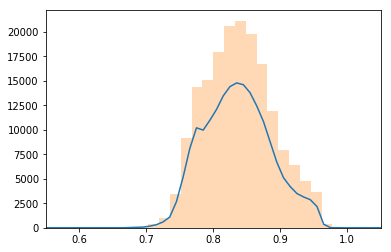

In [271]:
# Nz is half a bin off --> this is being propagated elsewhere in this notebook. 
plt.plot(zl+(zl[2]-zl[1])/2, 1.1*nzs[indexes[zbin]]*len(redshift_all)*(zl[2]-zl[1]))
#plt.hist(halo_cat['redshift'], alpha = 0.3, bins = 30)
plt.hist(redshift_all, alpha = 0.3, bins = 28)
plt.xlim(zmin, zmax)

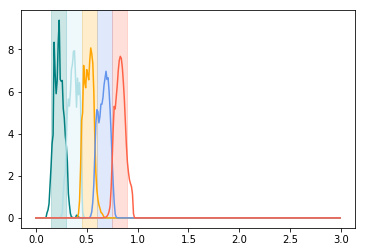

In [272]:
c = ['teal', 'powderblue', 'orange',  'cornflowerblue', 'tomato',  'gray']
zbins_l = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
for i in range(5):
    plt.plot(zl, nzs[i], color = c[i])
    plt.axvspan(zbins_l[i], zbins_l[i+1], color = c[i], alpha = 0.2)

## Get the mean halo mass

In [273]:
def mean_halo_mass(z, m_arr, hmf=None, fitted_function=None):

    # galaxy number density calculation
    ngal = ngal_hod(z, m_arr, hmf=hmf, fitted_function=fitted_function)
    
    # convert to scale factor
    a = 1./(1+z)
    
    # HMF calculation
    if hmf is not None:
        dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving)
        Numgal = N_total_function(m_arr)# HOD profile
        integrand = m_arr * dndlnM * Numgal
    else:
        integrand = m_arr * fitted_function

    return np.trapz(y=integrand, x=np.log10(m_arr))/ngal

def mean_halo_mass_zavg(zl, nzl, m_arr, hmf=None, fitted_function=None):
    """
    Calculates the redshift averaged halo mass.
    """
    # setup integrand
    halo_mass_zs = []
    for i in range(len(zl)):
        halo_mass_zs.append(mean_halo_mass(zl[i], m_arr, hmf=hmf, fitted_function=fitted_function))
    halo_mass_zs = np.array(halo_mass_zs)
    
    integrand = halo_mass_zs * nzl

    return np.trapz(y=integrand, x=zl)

Sheth99 30131386507817.434
Jenkins01 29924389869502.414
Angulo12 30500621884886.125
Press74 19241722627481.91
True 29593134023276.203
Interpolated function 28842820693492.13
Error on the mean 194174955456.333


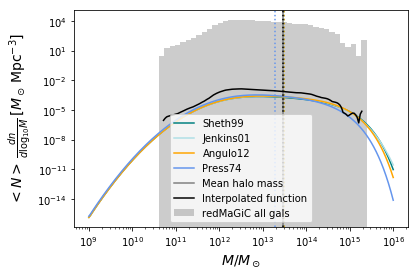

In [274]:
c = ['teal', 'powderblue', 'orange',  'cornflowerblue', 'tomato',  'gray']
z = 0.5189374243460871
a = 1./(1+z)
factor = 10**7

#m_arr = np.geomspace(1E10,3E15,128)

m_arr = np.geomspace(10**9,10**16,252)
hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False)
dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None)
plt.plot(m_arr, dndlnM*N_total_function(m_arr), label=hmf.name , color = c[0])
halo_mass_result = mean_halo_mass_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, hmf=hmf)
halo_mass_Sheth99 = halo_mass_result
plt.axvline(x=halo_mass_result, ls = ':', color = c[0])
plt.xscale('log')
print(hmf.name, halo_mass_result)

hmf = ccl.halos.hmfunc.MassFuncJenkins01(cosmo, mass_def=None, mass_def_strict=True)
dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None)
plt.plot(m_arr, dndlnM*N_total_function(m_arr), label=hmf.name , color = c[1])
halo_mass_result = mean_halo_mass_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, hmf=hmf)
plt.axvline(x=halo_mass_result, ls = ':', color = c[1])
plt.xscale('log')
print(hmf.name, halo_mass_result)

hmf = ccl.halos.hmfunc.MassFuncAngulo12(cosmo, mass_def=None, mass_def_strict=True)#default using FoF masses
dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None)
plt.plot(m_arr, dndlnM*N_total_function(m_arr), label=hmf.name , color = c[2])
halo_mass_result = mean_halo_mass_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, hmf=hmf)
plt.axvline(x=halo_mass_result, ls = ':', color = c[2])
plt.xscale('log')
print(hmf.name, halo_mass_result)

hmf = ccl.halos.hmfunc.MassFuncPress74(cosmo, mass_def=None, mass_def_strict=True)
dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None)
plt.plot(m_arr, dndlnM*N_total_function(m_arr), label=hmf.name , color = c[3])
halo_mass_result = mean_halo_mass_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, hmf=hmf)
plt.axvline(x=halo_mass_result, ls = ':', color = c[3])
plt.xscale('log')
print(hmf.name, halo_mass_result)

#plt.ylim([1E9,8.5E9])
true_halo_mass = halo_mass_all.mean()
print('True', true_halo_mass)

nbins = 50
bins = np.geomspace(1E10, 1E16, nbins)
m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)

bins_centers = np.sqrt(bins[1:] * bins[:-1]) #geometric mean
plt.axvline(x=halo_mass_all.mean(), label= 'Mean halo mass', ls = '-', color = 'gray')
counts_allgals, _, _= plt.hist(halo_mass_all, label = 'redMaGiC all gals', bins = bins, log= True, alpha = 0.4, color = 'gray')
cosmodc2_mass_function_redmagic_gals = interp1d(bins_centers, counts_allgals/factor, kind='linear', axis=- 1, copy=True, bounds_error=None, assume_sorted=False)
m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)

plt.plot(m_arr, cosmodc2_mass_function_redmagic_gals(m_arr), color='k', label = 'Interpolated function')

halo_mass_result = mean_halo_mass_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
print('Interpolated function', halo_mass_result)
halo_mass_fitted_function = halo_mass_result
plt.axvline(x=halo_mass_result, ls = ':', color ='black')

plt.legend()
plt.xlabel(r'$M/M_\odot$', fontsize=14)
plt.ylabel(r'$<N>\,\frac{dn}{d\log_{10}M}\,[M_\odot\,{\rm Mpc}^{-3}]$',fontsize=14)


# get errorbar
err =  halo_mass_all.std()/np.sqrt(len(halo_mass_all))
print('Error on the mean', err)

np.savetxt('../HOD_pars/mean_halo_mass_zbin_%s'%(indexes[zbin]+1), np.array([true_halo_mass/10**13, halo_mass_Sheth99/10**13, halo_mass_fitted_function/10**13, err/10**13]), header = 'True HMF_Sheth99  HMF_fitted_function Error_on_mean (all divied by 10**13)')

## Get the galaxy bias using the fitted function above

In [275]:
indexes = {'bin1': 0, 'bin2': 1, 'bin3': 2, 'bin4': 3, 'bin5': 4}
m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)
hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False)

hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) #fof masses will be used by default
bias_sheth = bgal_avg_hod(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
#print('bias_sheth', bias_sheth/0.7580968784936416)
print('bias_sheth', bias_sheth)

hbias = ccl.halos.hbias.HaloBiasBhattacharya11(cosmo, mass_def=None, mass_def_strict=True)#fof masses will be used by default
bias_bhattacharya = bgal_avg_hod(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
#print('bias_bhattacharya', bias_bhattacharya/0.6915813923549738)
print('bias_bhattacharya', bias_bhattacharya)

np.savetxt('../HOD_pars/galaxy_bias_zbin_%s_hmffittedfunction'%(indexes[zbin]+1), np.array([bias_sheth, bias_bhattacharya]), header = 'HaloBiasSheth01  HaloBiasBhattacharya11')

bias_sheth 2.1755527636742444
bias_bhattacharya 1.8370479233940058


## Get standard deviation for halo mass

In [276]:
def squared_mean_halo_mass(z, m_arr, hmf=None, fitted_function=None):

    # galaxy number density calculation
    ngal = ngal_hod(z, m_arr, hmf=hmf, fitted_function=fitted_function)
    
    # convert to scale factor
    a = 1./(1+z)
    
    # HMF calculation
    if hmf is not None:
        dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving)
        Numgal = N_total_function(m_arr)# HOD profile
        integrand = m_arr**2 * dndlnM * Numgal
    else:
        integrand = m_arr**2 * fitted_function

    return np.trapz(y=integrand, x=np.log10(m_arr))/ngal

def squared_mean_halo_mass_zavg(zl, nzl, m_arr, hmf=None, fitted_function=None):
    """
    Calculates the redshift averaged halo mass.
    """
    # setup integrand
    halo_mass_zs = []
    for i in range(len(zl)):
        halo_mass_zs.append(squared_mean_halo_mass(zl[i], m_arr, hmf=hmf, fitted_function=fitted_function))
    halo_mass_zs = np.array(halo_mass_zs)
    
    integrand = halo_mass_zs * nzl

    return np.trapz(y=integrand, x=zl)

def sigma_halo_mass(zl, nzl, m_arr, hmf=None, fitted_function=None):
    mean_squared = squared_mean_halo_mass_zavg(zl, nzl, m_arr, hmf=hmf, fitted_function=fitted_function)
    mean_mass = mean_halo_mass_zavg(zl, nzl, m_arr, hmf=hmf, fitted_function=fitted_function)
    return np.sqrt(mean_squared - mean_mass**2)

In [277]:
indexes = {'bin1': 0, 'bin2': 1, 'bin3': 2, 'bin4': 3, 'bin5': 4}
print(indexes[zbin])
m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)
hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False) #default using FoF masses

std_true = halo_mass_all.std()/10**(13)
std_Sheth99 = sigma_halo_mass(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, hmf=hmf)/10**13
std_fitted_function = sigma_halo_mass(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, hmf = None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))/10**13
print('True standard deviation:', std_true)
print( 'Sigma with Sheth99 hmf:' , std_Sheth99)
print( 'Sigma with fitted function:', std_fitted_function)


np.savetxt('../HOD_pars/std_zbin_%s'%(indexes[zbin]+1), np.array([std_true, std_Sheth99, std_fitted_function]), header = 'True HMF_Sheth99  HMF_fitted_function (All divided by 10**13)')

4
True standard deviation: 8.12661045845743
Sigma with Sheth99 hmf: 6.875525947425483
Sigma with fitted function: 6.7659829811965855


In [278]:
zbin

'bin5'

## Check normalization of the halo bias

In [279]:
def bias_norm(z, m_arr, halo_bias, hmf=None, fitted_function=None):
    """
    Calculates the galaxy bias, based on HOD modeling
    input
    -----
    - z : redshift
    output
    ------
    galaxy bias, dimensionless
    """
   
    # convert to scale factor
    a = 1./(1+z)
        
    # halo bias calculation
    b_h = hbias.get_halo_bias(cosmo, m_arr, a, mdef_other=None)
    
    if hmf is not None:
        # HMF calculation
        dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving)
        
    else:
        # note: fitted_function = dndlnM * Numgal
        Numgal = N_total_function(m_arr)
        dndlnM = fitted_function/Numgal

    integrand = dndlnM * b_h * m_arr
    
    rho_m = ccl.background.rho_x(cosmo, a, species='matter', is_comoving=True)

    return np.trapz(y=integrand, x=np.log10(m_arr))/rho_m



def bias_norm_zavg(zl, nzl, m_arr, halo_bias, hmf=None, fitted_function=None):

    # setup integrand
    bias_zs = []
    for i in range(len(zl)):
        bias_zs.append(bias_norm(zl[i], m_arr, halo_bias=halo_bias, hmf=hmf, fitted_function=fitted_function))
    bias_zs = np.array(bias_zs)
    
    integrand = bias_zs * nzl

    return np.trapz(y=integrand, x=zl)

In [280]:
m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)

z = 0.33
hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) #fof masses will be used by default
bias_sheth = bias_norm(z, m_arr, halo_bias=hbias, hmf=None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
print('bias norm Sheth', bias_sheth)
#bias_sheth = bias_norm_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
#print('bias norm Sheth z averaged', bias_sheth)

m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)
hbias = ccl.halos.hbias.HaloBiasBhattacharya11(cosmo, mass_def=None, mass_def_strict=True)#fof masses will be used by default
bias_bhattacharya = bias_norm(z, m_arr, halo_bias=hbias, hmf=None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
print('bias norm Bhattacharya', bias_bhattacharya)

#bias_bhattacharya = bias_norm_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=None, fitted_function = cosmodc2_mass_function_redmagic_gals(m_arr))
#print('bias norm Bhattacharya z averaged', bias_bhattacharya)

bias norm Sheth 2.4782951472265395
bias norm Bhattacharya 2.1364449696742183


In [281]:
m_arr = np.geomspace(10**6,10**17,252)
#m_arr = np.geomspace(halo_mass_all.min(),halo_mass_all.max(),128)

hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False)
#hmf = ccl.halos.hmfunc.MassFuncAngulo12(cosmo, mass_def=None, mass_def_strict=True)
#hmf = ccl.halos.hmfunc.MassFuncJenkins01(cosmo, mass_def=None, mass_def_strict=True)
#hmf = ccl.halos.hmfunc.MassFuncPress74(cosmo, mass_def=None, mass_def_strict=True)

hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) #fof masses will be used by default
bias_sheth = bias_norm(z, m_arr, halo_bias=hbias, hmf=hmf, fitted_function = None)
print('bias norm sheth, with %s hmf:'%hmf.name, bias_sheth)

#bias_sheth = bias_norm_zavg(zl+(zl[2]-zl[1])/2., nzs[indexes[zbin]], m_arr, halo_bias=hbias, hmf=hmf, fitted_function = None)
#print('bias norm sheth zavg, with %s hmf:'%hmf.name, bias_sheth)

#m_arr = np.geomspace(10**8,10**16,252)
hbias = ccl.halos.hbias.HaloBiasBhattacharya11(cosmo, mass_def=None, mass_def_strict=True)#fof masses will be used by default
bias_bhattacharya = bias_norm(z, m_arr, halo_bias=hbias, hmf=hmf, fitted_function = None)
print('bias norm Bhattacharya11, with %s hmf:'%hmf.name, bias_bhattacharya)

bias norm sheth, with Sheth99 hmf: 0.7580968784936416
bias norm Bhattacharya11, with Sheth99 hmf: 0.6915813923549738


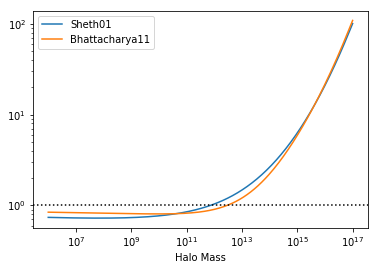

In [282]:
z = 0.33
hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) 
plt.plot(m_arr, hbias.get_halo_bias(cosmo, m_arr, 1./(1+z), mdef_other=None), label = hbias.name)
hbias = ccl.halos.hbias.HaloBiasBhattacharya11(cosmo, mass_def=None, mass_def_strict=True)
plt.plot(m_arr, hbias.get_halo_bias(cosmo, m_arr, 1./(1+z), mdef_other=None), label = hbias.name)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.yscale('log')
plt.axhline(y=1, ls = ':', color = 'k')
plt.legend()

In [283]:
ccl.background.rho_x(cosmo, 1./(1+z), species='matter', is_comoving=True)

37047151422.19486